# Setting Up

In [127]:
from config.utils import *

df = pd.read_json('../assets/data/news_dataset.json', lines=True)

if len(df) != 0:
    logger.info(f'Dataset imported successfully with {len(df)} entries 🎉')

2023-08-21 14:52:46.147 | INFO     | __main__:<module>:6 - Dataset imported successfully with 209527 entries 🎉


# Quick EDA

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [129]:
df.sample(5)

,link,headline,category,short_description,authors,date
69852,https://www.huffingtonpost.com/entry/to-save-h...,"To Save His Middle East Legacy, Obama Must Rec...",WORLDPOST,No matter how he adjusts his views after leavi...,"Ibrahim Fraihat, ContributorSenior Foreign Pol...",2016-04-17
65543,https://www.huffingtonpost.com/entry/nba-final...,Golden State Humiliates Cleveland In Game 2 Of...,SPORTS,Draymond Green led the way as the Warriors cru...,Maxwell Strachan,2016-06-06
100105,https://www.huffingtonpost.com/entry/chinese-c...,The Hide and Seek of Jiang Wen,POLITICS,Wenbin Gao reviews the popular Chinese blockbu...,"China Hands, ContributorFor Future Leaders in ...",2015-05-10
99567,https://www.huffingtonpost.com/entry/fra-amtra...,U.S. Regulators Order Amtrak To Improve Safety...,POLITICS,,,2015-05-16
13278,https://www.huffingtonpost.com/entry/e-produce...,E! Producer Says She Was Fired For Allowing An...,MEDIA,Aileen Gram-Moreno claims that a red-carpet ch...,Ryan Grenoble,2018-03-03


2023-08-21 14:53:01.518 | INFO     | __main__:<module>:1 - There are 12 unique categories. These are the overall distribution.


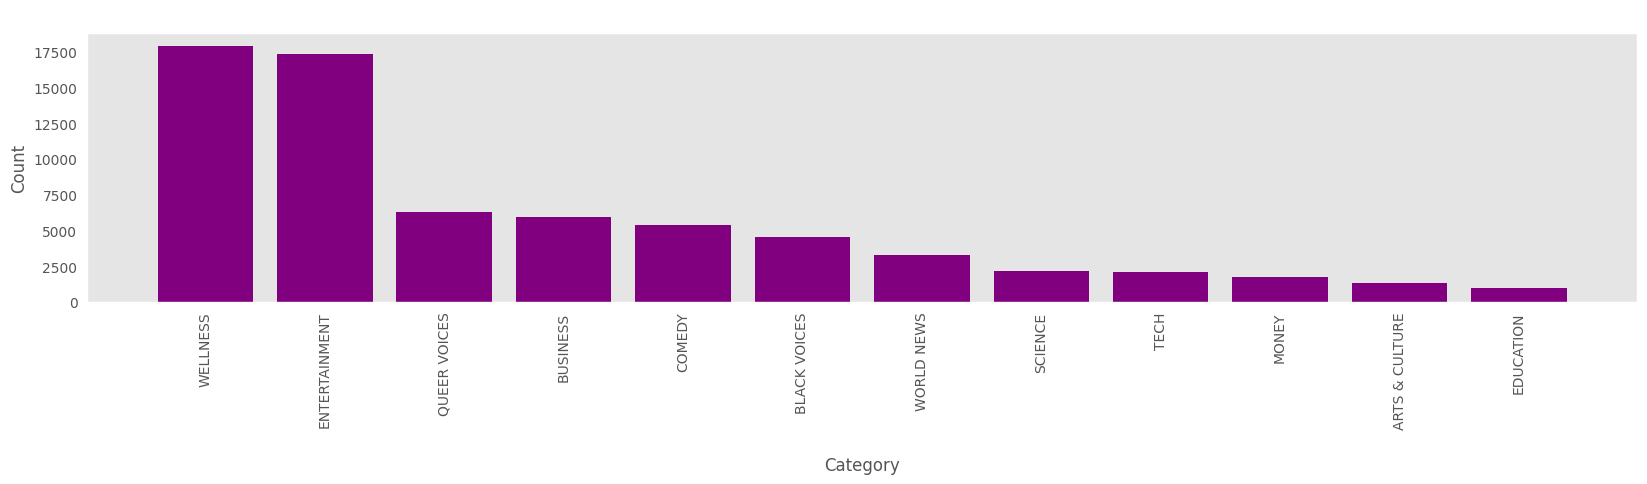

In [134]:
logger.info(f'There are {len(df.category.unique())} unique categories. These are the overall distribution.')
categories_counter = dict((Counter(df.category)))
aux = pd.DataFrame(list(categories_counter.items()), columns=['category', 'count']).sort_values('count', ascending=False)

plt.style.use('ggplot')
plt.figure(figsize=(20, 3.5))

plt.bar(aux['category'], aux['count'], color='purple')
plt.title('Frequency of Categories')
plt.xlabel('\nCategory')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.grid(False)
plt.show()

2023-08-21 14:53:03.372 | INFO     | __main__:<module>:18 - Here's the selected one with the length of 69347


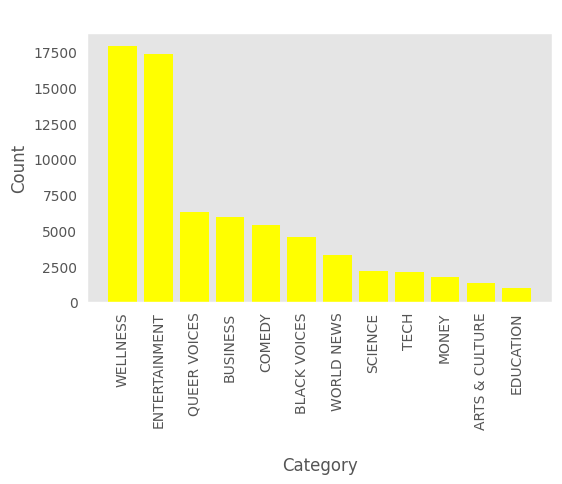

In [135]:
categories = list([
    'COMEDY',
    'WORLD NEWS',
    'TECH',
    'ENTERTAINMENT',
    'EDUCATION',
    'SCIENCE',
    'BUSINESS',
    'QUEER VOICES',
    'WELLNESS',
    'BLACK VOICES',
    'MONEY',
    'ARTS & CULTURE'
])

df = df[df['category'].isin(categories)]

logger.info(f'Here\'s the selected one with the length of {len(df)}')

categories_counter = dict((Counter(df.category)))
aux = pd.DataFrame(list(categories_counter.items()), columns=['category', 'count']).sort_values('count', ascending=False)

plt.figure(figsize=(6, 3.5))

plt.bar(aux['category'], aux['count'], color='yellow')
plt.title('Frequency of Categories')
plt.xlabel('\nCategory')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [136]:
df.to_pickle('../assets/data/news_dataset_sampled.pkl')

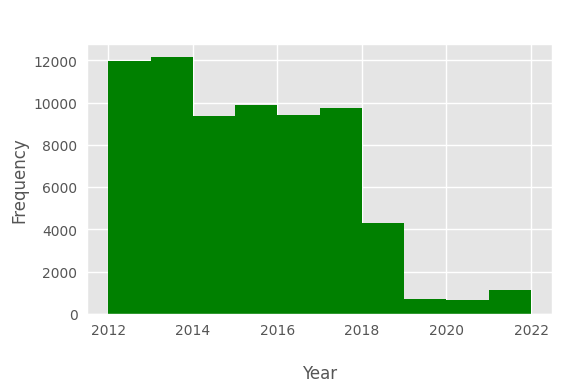

In [137]:
years = df.date.map(lambda x: x.year)

plt.figure(figsize=(6, 3.5))

plt.hist(years, bins=10, color='green')
plt.suptitle('Years Distribution')
plt.ylabel('Frequency')
plt.xlabel('\nYear')
plt.show()